In [1]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
df = pd.read_csv("ebay_cleaned.csv")

In [2]:
# Assign random A/B groups
df['Group'] = np.random.choice(['A', 'B'], size=len(df), replace=True)

In [3]:
# Function to compute conversion rate
def conversion_rate(df, col):
    return df.groupby('Group')[col].mean()

In [4]:
# Function to perform t-test
def perform_ttest(df, col):
    group_a = df[df['Group'] == 'A'][col]
    group_b = df[df['Group'] == 'B'][col]
    return stats.ttest_ind(group_a, group_b, equal_var=False)

In [5]:
# Run tests for different variables
for col in ['Price', 'Shipping Cost', 'Available Coupons', 'Seller Rating']:
    print(f"\n### {col} Test Results ###")
    print("Conversion Rates:")
    print(conversion_rate(df, col))


### Price Test Results ###
Conversion Rates:
Group
A    451.277027
B    426.038000
Name: Price, dtype: float64

### Shipping Cost Test Results ###
Conversion Rates:
Group
A    0.0
B    0.0
Name: Shipping Cost, dtype: float64

### Available Coupons Test Results ###
Conversion Rates:
Group
A    0.0
B    0.0
Name: Available Coupons, dtype: float64

### Seller Rating Test Results ###
Conversion Rates:
Group
A    567.594595
B    544.933333
Name: Seller Rating, dtype: float64


In [7]:
t_stat, p_val = perform_ttest(df, col)
print(f"T-statistic: {t_stat:.3f}, P-value: {p_val:.3f}")

T-statistic: 0.463, P-value: 0.644


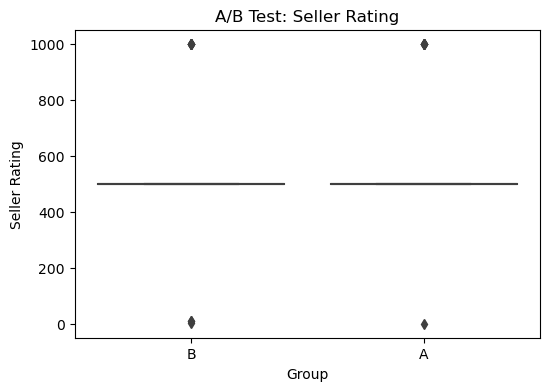

In [9]:
# Plot
plt.figure(figsize=(6,4))
sns.boxplot(x='Group', y=col, data=df)
plt.title(f"A/B Test: {col}")
plt.show()